### Ideas: Generating Random Ideas

Generating random ideas can be a fun exercise. You can use Python's random module to create a simple idea generator. Here's an example:

In [1]:
import random

ideas = ["Build a time-travel app", "Create a robot chef", "Design a smart mirror"]

random_idea = random.choice(ideas)

print("Random Idea:", random_idea)


Random Idea: Design a smart mirror


### Logic: Implementing a Truth Table

Logic is fundamental in computer science. You can create a truth table for a logical expression. 
- For example, let's take the expression (A AND B) OR (NOT C):

In [2]:
def truth_table():
    results = []
    for A in [True, False]:
        for B in [True, False]:
            for C in [True, False]:
                result = (A and B) or (not C)
                results.append((A, B, C, result))
    return results

table = truth_table()

for row in table:
    print(row)


(True, True, True, True)
(True, True, False, True)
(True, False, True, False)
(True, False, False, True)
(False, True, True, False)
(False, True, False, True)
(False, False, True, False)
(False, False, False, True)


### Counting: Counting Vowels in a String

Counting is a common task in programming. Here's an example of counting vowels in a string:

In [4]:
def count_vowels(text):
    vowels = "AEIOUaeiou"
    return sum(1 for char in text if char in vowels)

text = "Hello, World!"
vowel_count = count_vowels(text)
print("Vowel Count:", vowel_count)


Vowel Count: 3


### Probability: Simulating a Coin Flip

Probability often involves simulating random events. Let's simulate a coin flip:

In [5]:
import random

def coin_flip():
    return random.choice(["Heads", "Tails"])

num_flips = 10
results = [coin_flip() for _ in range(num_flips)]

print("Coin Flips:", results)

Coin Flips: ['Tails', 'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails']


---
### Trading Algorithm: Implementing a Simple Trading Algorithm

In [40]:
class Stock():
    def __init__(self, symbol, price_history):
        self.symbol = symbol
        self.price_history = price_history


class StockTrader():
    def __init__(self, stock):
        self.stock = stock
        self.cash = 1000
        self.shares = 0
        self.missed_buys = 0  # Track missed buy attempts

    def buy(self, price):
        if self.cash >= price:
            self.shares += 1
            self.cash -= price
        else:
            self.missed_buys += 1  # Increment missed buy count

    def sell(self):
        self.shares -= 1
        self.cash += self.stock.price_history[-1]

    def trade(self):
        for i in range(1, len(self.stock.price_history)):
            if self.stock.price_history[i] > self.stock.price_history[i - 1]:
                self.buy(self.stock.price_history[i])
            else:
                self.sell()

    def simulate(self, days):
        for day in range(days):
            if self.stock.price_history[day] > self.stock.price_history[day - 1]:
                self.buy(self.stock.price_history[day])
            else:
                self.sell()

    def __str__(self):
        return f"Trader: {self.stock.symbol} | Cash: {self.cash:.2f} | Shares: {self.shares} | Missed Buys: {self.missed_buys}"


In [41]:

if __name__ == "__main__":
    # Create a stock with some price history
    stock_data = [100, 105, 110, 108, 115, 120, 118]
    stock = Stock("AAPL", stock_data)
    
    # Create a stock trader with the stock
    trader = StockTrader(stock)
    
    # Simulate trading for a certain number of days
    trader.simulate(len(stock_data))
    
    # Print the final state of the trader's portfolio
    print(trader)

Trader: AAPL | Cash: 904.00 | Shares: 1 | Missed Buys: 0


### Moving Average Strategy: A strategy that uses moving averages to make buy and sell decisions. 
Calculate short-term and long-term moving averages of the stock price and buy when the short-term average crosses above the long-term average and sell when it crosses below.

In [18]:
class MovingAverage():
    def __init__(self, window_size):
        self.window_size = window_size
        self.prices = []
        self.ma = []

    def add_price(self, price):
        self.prices.append(price)
        if len(self.prices) >= self.window_size:
            window = self.prices[-self.window_size:]
            self.ma.append(sum(window) / self.window_size)

    def get_moving_average(self):
        return self.ma

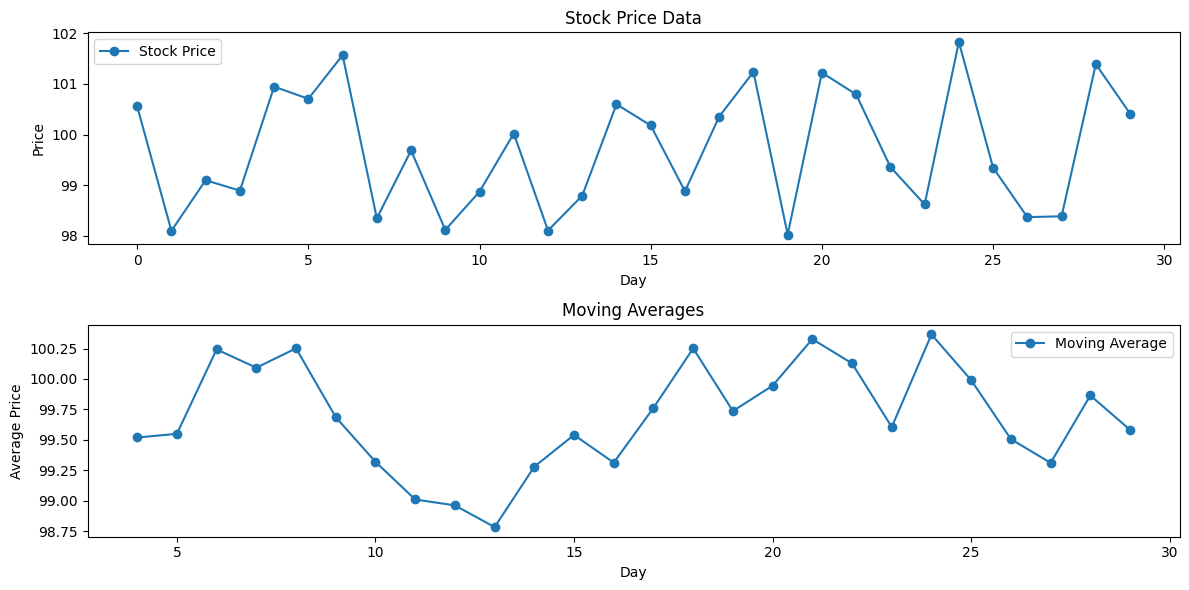

Final Portfolio:
Trader: AAPL | Cash: $94.98 | Shares: 9 | Missed Buys: 21

Moving Averages:
[99.51931905949, 99.54913721066202, 100.24287226064777, 100.092399872056, 100.25136873728516, 99.6860295415044, 99.31958033140896, 99.01012090772778, 98.96179861737133, 98.78333128217244, 99.27940105684559, 99.54044386148529, 99.31251212863516, 99.7626958999888, 100.25117014478174, 99.73646160230058, 99.94516381928425, 100.32732283764228, 100.12811070375592, 99.6049499382631, 100.36552138828607, 99.99014162290992, 99.50582678162347, 99.31099946987584, 99.86461136310439, 99.58182173043248]


In [42]:
import random
import matplotlib.pyplot as plt

# Generate random stock price data
random.seed(42)  # for reproducibility
price_data = [100 + random.uniform(-2, 2) for _ in range(30)]

# Create a stock with the generated price data
stock = Stock("AAPL", price_data)

# Create a trader with the stock
trader = StockTrader(stock)

# Create a moving average calculator with a window size of 5
ma_calculator = MovingAverage(5)

# Lists to store data for visualization
portfolio_values = []
moving_averages = []

# Simulate trading and calculate moving averages
for price in price_data:
    trader.simulate(1)
    ma_calculator.add_price(price)

    # Append portfolio value and moving average for visualization
    portfolio_values.append(trader.cash + (trader.shares * price))
    moving_averages.append(ma_calculator.get_moving_average()[-1] if ma_calculator.ma else None)

# Plot stock price data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(price_data, label="Stock Price", marker='o', linestyle='-')
plt.title("Stock Price Data")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()

# Plot moving averages
plt.subplot(2, 1, 2)
plt.plot(moving_averages, label="Moving Average", marker='o', linestyle='-')
plt.title("Moving Averages")
plt.xlabel("Day")
plt.ylabel("Average Price")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Print the trader's final portfolio and missed buy attempts
print("Final Portfolio:")
print(f"Trader: {trader.stock.symbol} | Cash: ${trader.cash:.2f} | Shares: {trader.shares} | Missed Buys: {trader.missed_buys}")

# Print the calculated moving averages
print("\nMoving Averages:")
print(ma_calculator.get_moving_average())